In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# sex = (1 = male; 0 = female)
# cp = chest pain type نوع ألم الصدر
# trestbps = resting blood pressure (in mm Hg on admission to the hospital)
# chol = serum cholestoral in mg/dl مصل الكوليسترول 
# fbs = (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)  الصيام السكري
# restecg = resting electrocardiographic results
# thalach = maximum heart rate achieved
# exang = exercise induced angina (1 = yes; 0 = no) الذبحة الصدرية
# oldpeak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment



In [4]:
print('1', dataset['sex'].unique())
print('2', dataset['cp'].unique())
print('3', dataset['fbs'].unique())
print('4', dataset['restecg'].unique())
print('5', dataset['exang'].unique())
print('6', dataset['slope'].unique())
print('7', dataset['ca'].unique())
print('8', dataset['thal'].unique())
print('9', dataset['target'].unique())

1 [1 0]
2 [0 1 2 3]
3 [0 1]
4 [1 0 2]
5 [0 1]
6 [2 0 1]
7 [2 0 1 3 4]
8 [3 2 1 0]
9 [0 1]


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.6, random_state=0)

In [10]:
print(x_train.shape)
print(x_test.shape)

(410, 13)
(615, 13)


## For LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression(random_state=0)
l_reg.fit(x_train, y_train)

c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [12]:
y_pred = l_reg.predict(x_test)

In [13]:
from sklearn import metrics

In [14]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pred)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pred)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pred)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pred)):.3}%")

The acc is : 84.9%
The pre_score is :86.5 %
F1 Score is :85.8%
F1 Score is :85.2%


In [15]:
print(metrics.confusion_matrix(y_test, y_pred))

[[240  44]
 [ 49 282]]


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


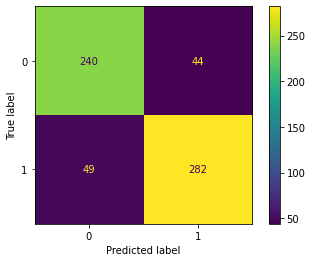

In [16]:
print(metrics.plot_confusion_matrix(l_reg, x_test, y_test))

## For DecisionTree

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.6, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classi = DecisionTreeClassifier(criterion= 'entropy', random_state= 42)
classi.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

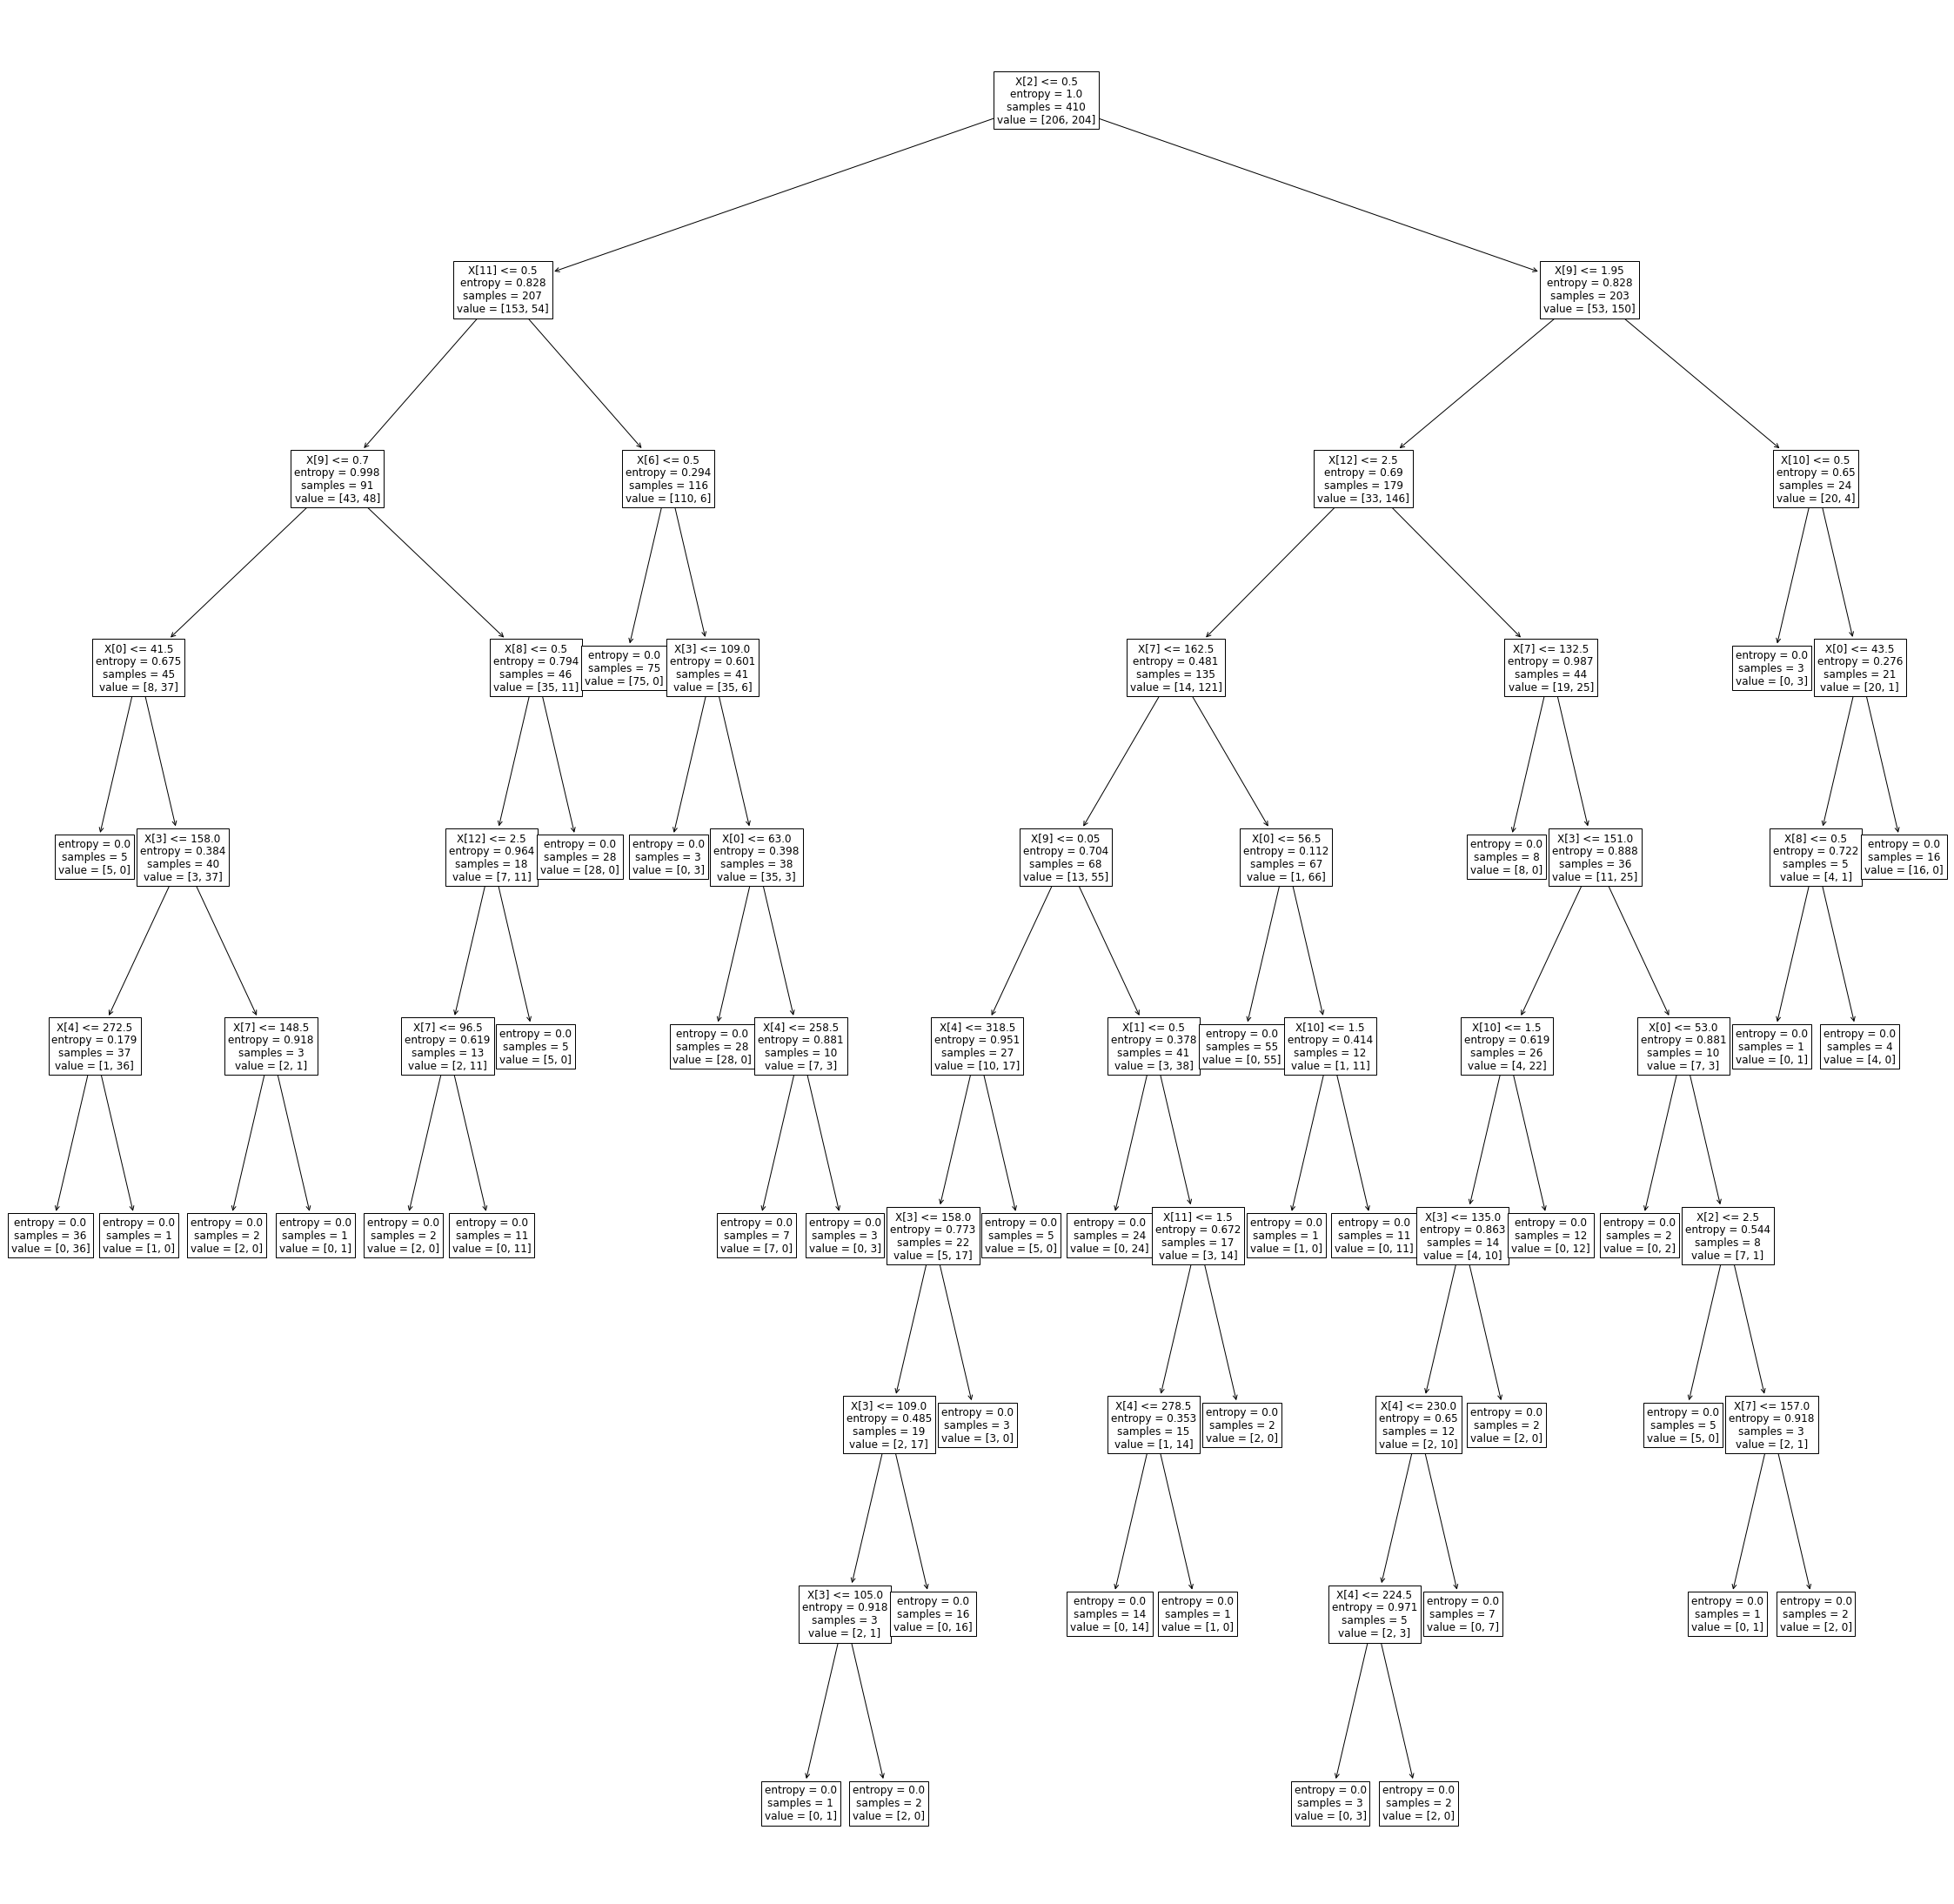

In [19]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(40,40))
tree.plot_tree(classi, fontsize= 12)
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
# reg_ssor = DecisionTreeClassifier(min_samples_split= 10,max_leaf_nodes=30 ,random_state=0)
reg_ssor = DecisionTreeClassifier(max_depth=5)
reg_ssor.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

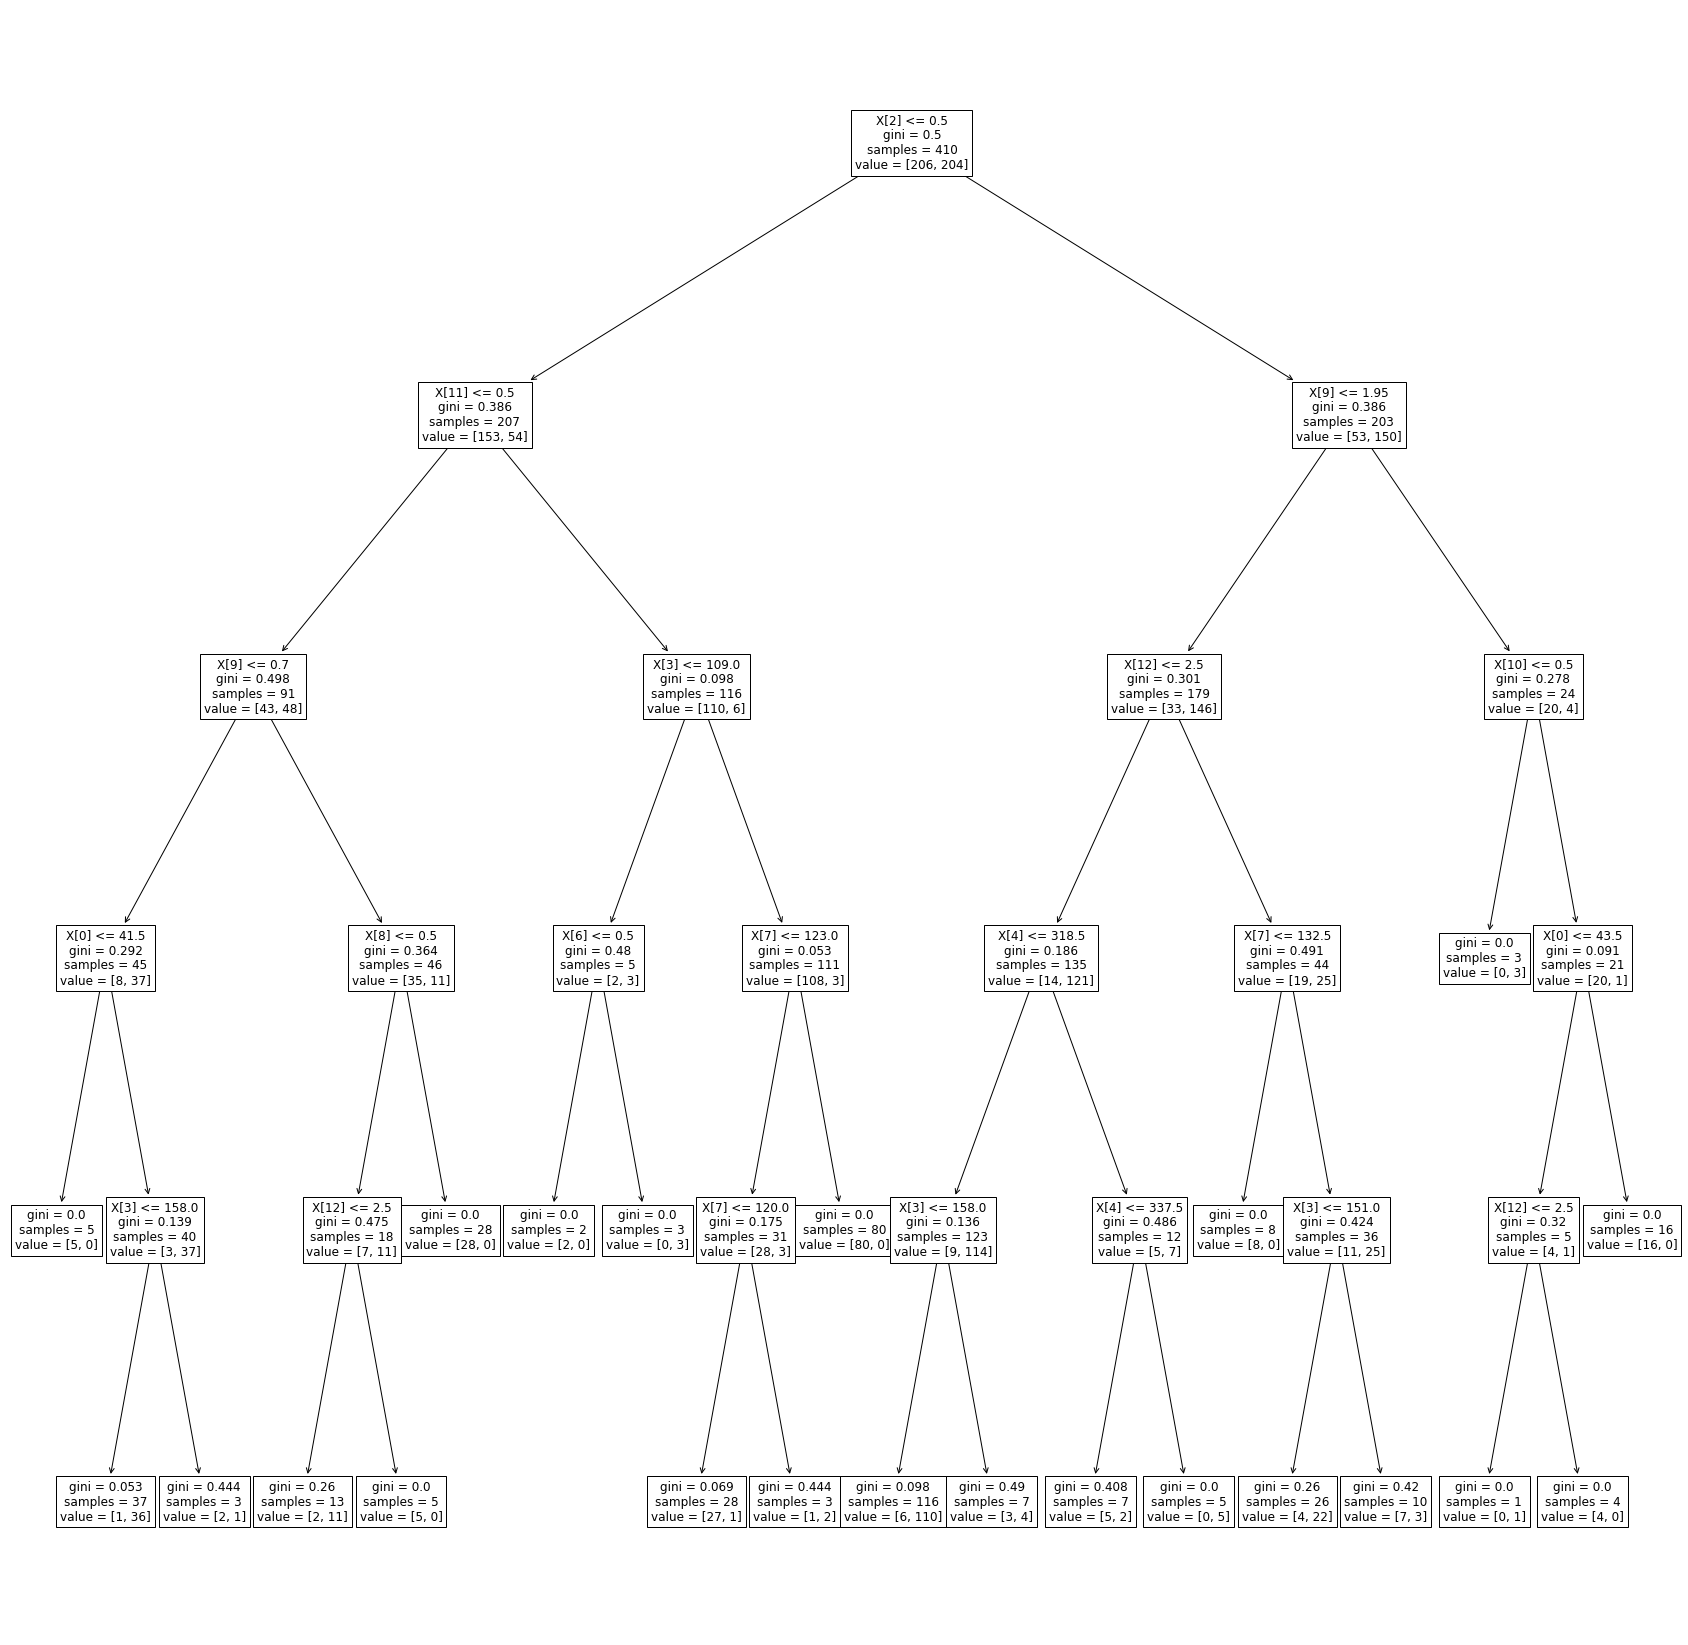

In [21]:
from sklearn import tree
# fig, ax = plt.subplots(figsize=(37,37))
fig, ax = plt.subplots(figsize=(30,30))
tree.plot_tree(reg_ssor, fontsize=12)
plt.show()

In [22]:
y_pred = classi.predict(x_test)

In [23]:
from sklearn import metrics

In [24]:
print(metrics.confusion_matrix(y_test, y_pred))

[[267  26]
 [ 21 301]]


In [25]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pred)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pred)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pred)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pred)):.3}%")

The acc is : 92.4%
The pre_score is :92.0 %
F1 Score is :92.8%
F1 Score is :93.5%


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


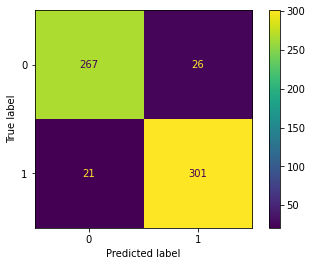

In [26]:
print(metrics.plot_confusion_matrix(classi, x_test, y_test))

## KNN

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.6, random_state=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
cl_ass = KNeighborsClassifier(n_neighbors= 5)
cl_ass.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
y_pr_KNN = cl_ass.predict(x_test)

In [30]:
print(metrics.confusion_matrix(y_test, y_pr_KNN))

[[194  90]
 [108 223]]


In [31]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pr_KNN)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pr_KNN)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pr_KNN)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pr_KNN)):.3}%")

The acc is : 67.8%
The pre_score is :71.2 %
F1 Score is :69.3%
F1 Score is :67.4%


## SVM

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.6, random_state=0)

In [33]:
from sklearn import svm
sv_model = svm.SVC(probability= True)                                                                                                                                                                           
sv_model.fit(x_train, y_train)

SVC(probability=True)

In [34]:
y_pr_svm = sv_model.predict(x_test)

In [35]:
print(metrics.confusion_matrix(y_test, y_pr_svm))

[[198  86]
 [ 95 236]]


In [36]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pr_svm)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pr_svm)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pr_svm)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pr_svm)):.3}%")

The acc is : 70.6%
The pre_score is :73.3 %
F1 Score is :72.3%
F1 Score is :71.3%


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


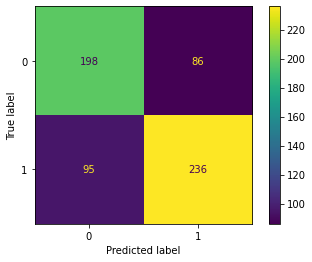

In [37]:
print(metrics.plot_confusion_matrix(sv_model, x_test, y_test))

In [38]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x, y)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smo, y_smo = smote.fit_resample(x, y)

under_samp = RandomUnderSampler(random_state=42)
x_und , y_und = under_samp.fit_resample(x, y)


tomek = TomekLinks()                        
x_tom , y_tom = under_samp.fit_resample(x, y)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_res, y_res, test_size = 0.6, random_state=42)

In [40]:
from xgboost import XGBClassifier
xg_class = XGBClassifier()
xg_class.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
xg_y_pred =xg_class.predict(x_test) 

In [42]:
print(metrics.confusion_matrix(y_test, xg_y_pred))

[[292  11]
 [ 27 302]]


In [43]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, xg_y_pred)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, xg_y_pred)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, xg_y_pred)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, xg_y_pred)):.3}%")

The acc is : 94.0%
The pre_score is :96.5 %
F1 Score is :94.1%
F1 Score is :91.8%


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


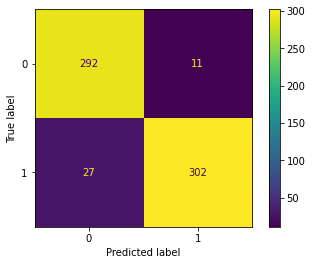

In [44]:
print(metrics.plot_confusion_matrix(xg_class, x_test, y_test))

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_smo, y_smo ,test_size = 0.6, random_state=42)

In [46]:
from xgboost import XGBClassifier
xg_smo_class = XGBClassifier()
xg_smo_class.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
xg_y_pred_smo = xg_smo_class.predict(x_test)

In [48]:
print(metrics.confusion_matrix(y_test ,xg_y_pred_smo))

[[288  15]
 [ 30 299]]


In [49]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, xg_y_pred_smo)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, xg_y_pred_smo)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, xg_y_pred_smo)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, xg_y_pred_smo)):.3}%")

The acc is : 92.9%
The pre_score is :95.2 %
F1 Score is :93.0%
F1 Score is :90.9%


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_und, y_und ,test_size = 0.6, random_state=42)

In [51]:
from xgboost import XGBRFClassifier
xg_und_class = XGBClassifier()
xg_und_class.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
y_pred_und = xg_und_class.predict(x_test)

In [53]:
print(metrics.confusion_matrix(y_test, y_pred_und))

[[300  13]
 [ 25 261]]


In [54]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pred_und)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pred_und)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pred_und)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pred_und)):.3}%")

The acc is : 93.7%
The pre_score is :95.3 %
F1 Score is :93.2%
F1 Score is :91.3%


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_tom, y_tom ,test_size = 0.6, random_state=42)

In [56]:
from xgboost import XGBClassifier
xg_class_tom = XGBClassifier()
xg_class_tom.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
y_pred_tom = xg_class_tom.predict(x_test)

In [58]:
print(metrics.confusion_matrix(y_test, y_pred_tom))

[[300  13]
 [ 25 261]]


In [59]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pred_tom)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pred_tom)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pred_tom)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pred_tom)):.3}%")

The acc is : 93.7%
The pre_score is :95.3 %
F1 Score is :93.2%
F1 Score is :91.3%


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


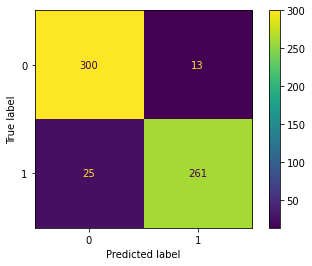

In [60]:
print(metrics.plot_confusion_matrix(xg_class_tom, x_test, y_test))

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y ,test_size = 0.6, random_state=42)

In [62]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test)
exp_variance = pc.explained_variance_ratio_

In [63]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=42)
lgr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [64]:
y_pred_lgr = lgr.predict(x_test)

In [65]:
print(metrics.confusion_matrix(y_test, y_pred_lgr))

[[196  97]
 [118 204]]


In [66]:
print(f"The acc is : {100*(metrics.accuracy_score(y_test, y_pred_lgr)):.3}%")
print(f"The pre_score is :{100*(metrics.precision_score(y_test, y_pred_lgr)):.3} %")
print(f"F1 Score is :{100*(metrics.f1_score(y_test, y_pred_lgr)):.3}%")
print(f"F1 Score is :{100*(metrics.recall_score(y_test, y_pred_lgr)):.3}%")

The acc is : 65.0%
The pre_score is :67.8 %
F1 Score is :65.5%
F1 Score is :63.4%


c:\Users\flash 26-11-2020\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


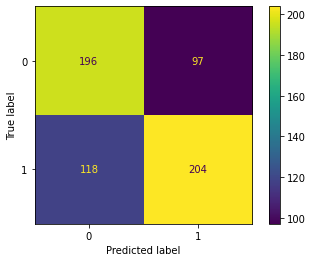

In [67]:
print(metrics.plot_confusion_matrix(lgr, x_test, y_test))